In [ ]:
#libaries needed
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import joblib


In [2]:
data = pd.read_csv("loan_data.csv")
data.head()

,id,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,1,22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
1,2,21,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0
2,3,25,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1
3,4,23,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1
4,5,24,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1


In [3]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              45000 non-null  int64  
 1   person_age                      45000 non-null  int64  
 2   person_gender                   45000 non-null  object 
 3   person_education                45000 non-null  object 
 4   person_income                   45000 non-null  int64  
 5   person_emp_exp                  45000 non-null  int64  
 6   person_home_ownership           45000 non-null  object 
 7   loan_amnt                       45000 non-null  int64  
 8   loan_intent                     45000 non-null  object 
 9   loan_int_rate                   45000 non-null  float64
 10  loan_percent_income             45000 non-null  float64
 11  cb_person_cred_hist_length      45000 non-null  int64  
 12  credit_score                    

In [4]:
data.describe(include = "all")


,id,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
count,45000.000000,45000.000000,45000,45000,4.500000e+04,45000.000000,45000,45000.000000,45000,45000.000000,45000.000000,45000.000000,45000.000000,45000,45000.000000
unique,NaN,NaN,2,5,NaN,NaN,4,NaN,6,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,male,Bachelor,NaN,NaN,RENT,NaN,EDUCATION,NaN,NaN,NaN,NaN,Yes,NaN
freq,NaN,NaN,24841,13399,NaN,NaN,23443,NaN,9153,NaN,NaN,NaN,NaN,22858,NaN
mean,22500.500000,27.764178,NaN,NaN,8.031905e+04,5.410333,NaN,9583.157556,NaN,11.006606,0.139725,5.867489,632.608756,NaN,0.222222
std,12990.525394,6.045108,NaN,NaN,8.042250e+04,6.063532,NaN,6314.886691,NaN,2.978808,0.087212,3.879702,50.435865,NaN,0.415744
min,1.000000,20.000000,NaN,NaN,8.000000e+03,0.000000,NaN,500.000000,NaN,5.420000,0.000000,2.000000,390.000000,NaN,0.000000
25%,11250.750000,24.000000,NaN,NaN,4.720400e+04,1.000000,NaN,5000.000000,NaN,8.590000,0.070000,3.000000,601.000000,NaN,0.000000
50%,22500.500000,26.000000,NaN,NaN,6.704800e+04,4.000000,NaN,8000.000000,NaN,11.010000,0.120000,4.000000,640.000000,NaN,0.000000
75%,33750.250000,30.000000,NaN,NaN,9.578925e+04,8.000000,NaN,12237.250000,NaN,12.990000,0.190000,8.000000,670.000000,NaN,0.000000


In [5]:
print(data.isnull().sum())
print("Duplicates:", data.duplicated().sum())

id                                0
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64
Duplicates: 0


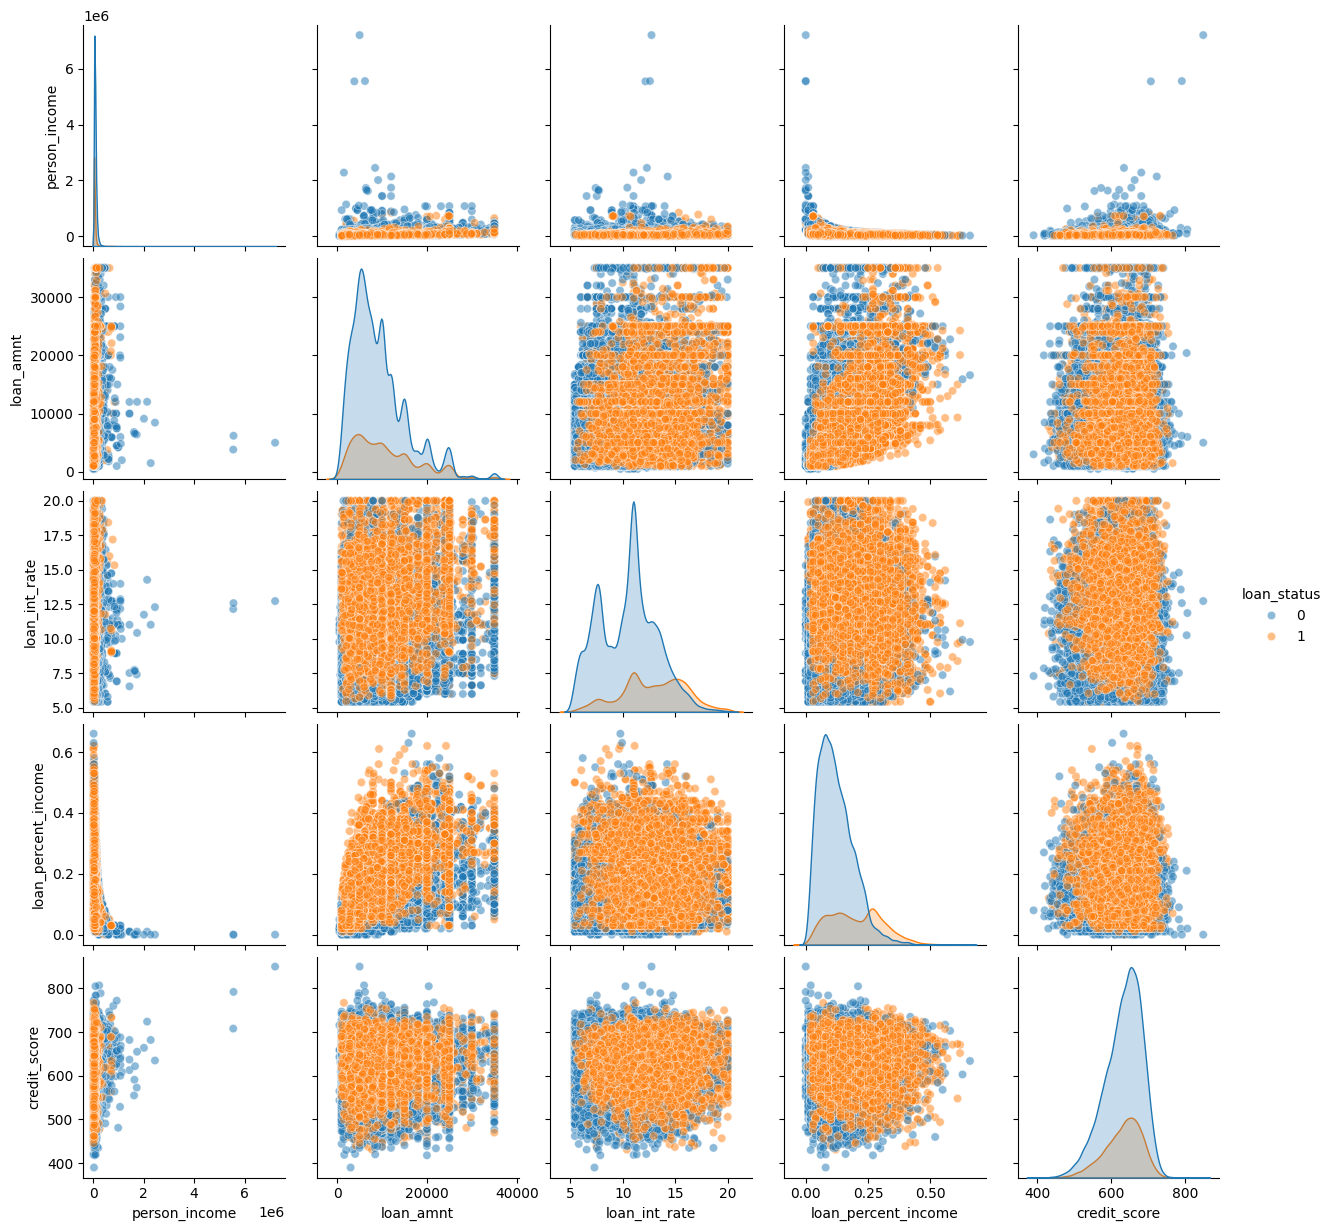

In [6]:
selected_cols = [
     'person_income',
     'loan_amnt',
     'loan_int_rate',
     'loan_percent_income',
     'credit_score',
     'loan_status',
 ]

sns.pairplot(data[selected_cols], hue='loan_status', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()



In [7]:
# Categorical features
cat_features = [
    'person_education',
    'person_home_ownership',
    'loan_intent',
    'previous_loan_defaults_on_file'
]


# Numerical features
num_features = [
    'person_age',
    'person_income',
    'person_emp_exp',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length',
    'credit_score'
]

# Target
target = 'loan_status'


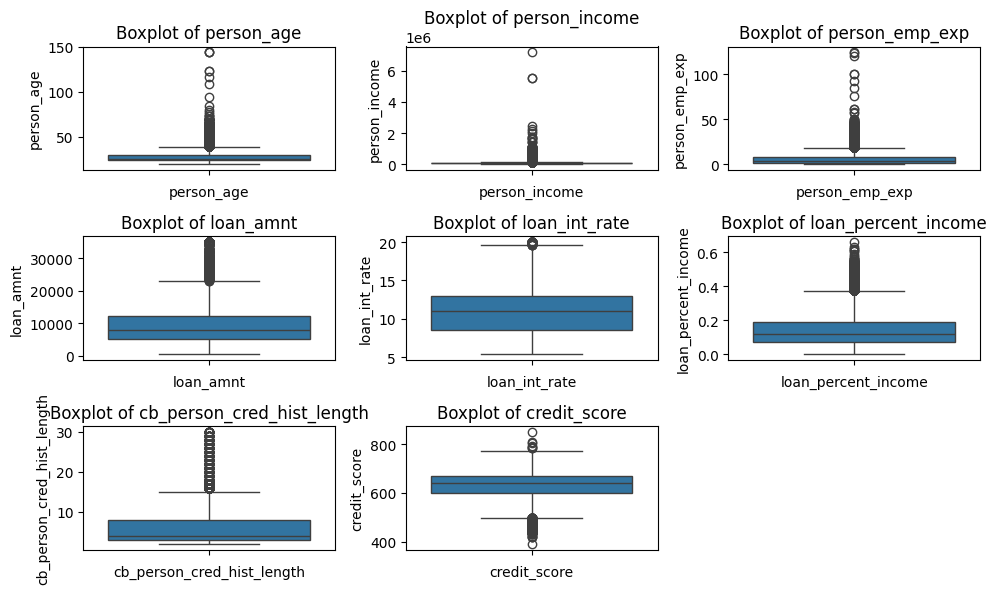

In [8]:
n_features = len(num_features)  
n_cols = 3 
n_rows = (n_features + n_cols - 1) // n_cols  
plt.figure(figsize=(10, 6))
for i, col in enumerate(num_features, 1):
    plt.subplot(n_rows, n_cols, i)  # 3 rows, 3 columns for 8 plots
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

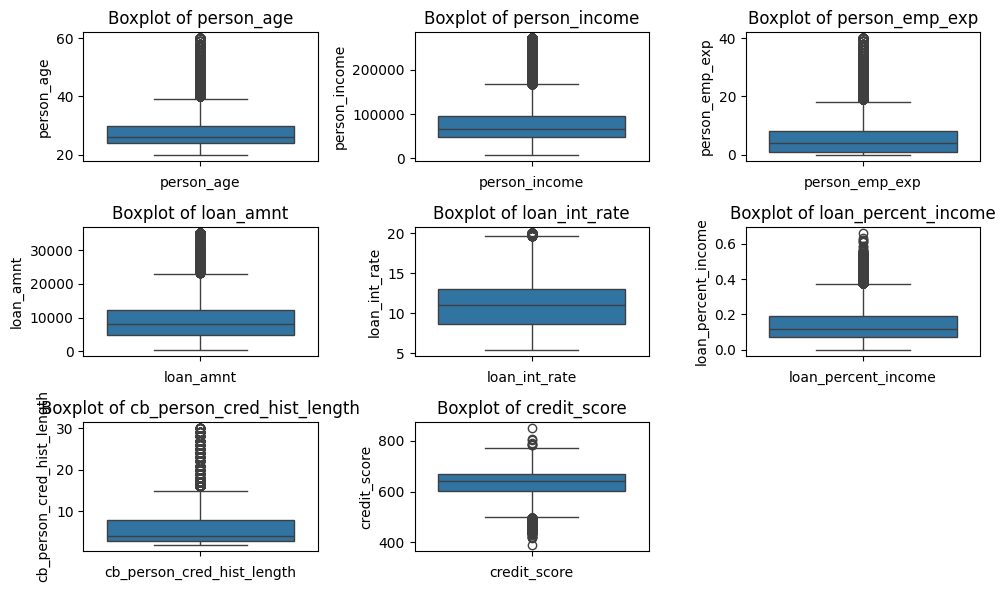

In [9]:
data['person_age'] = data['person_age'].clip(upper=60)
income_cap = data['person_income'].quantile(0.99)
data['person_income'] = data['person_income'].clip(upper=income_cap)
data['person_emp_exp'] = data['person_emp_exp'].clip(upper=40)
n_features = len(num_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols
plt.figure(figsize=(10, 6))
for i, col in enumerate(num_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

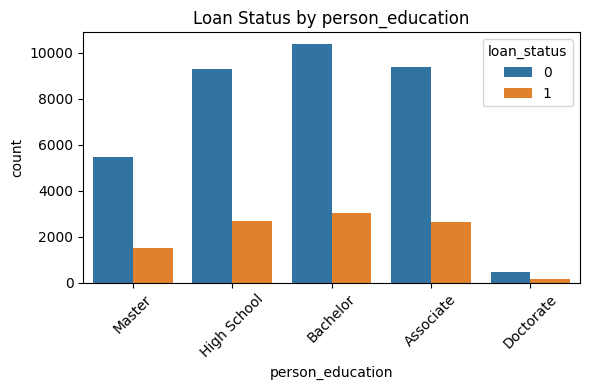

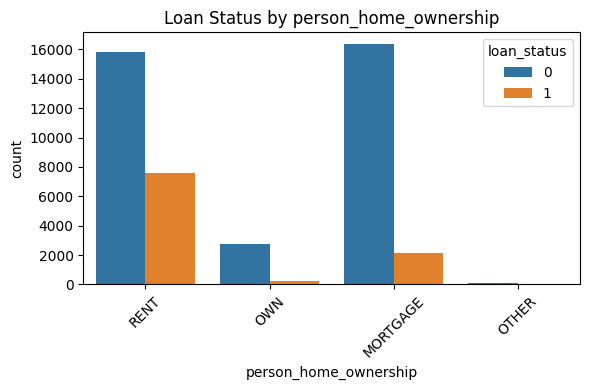

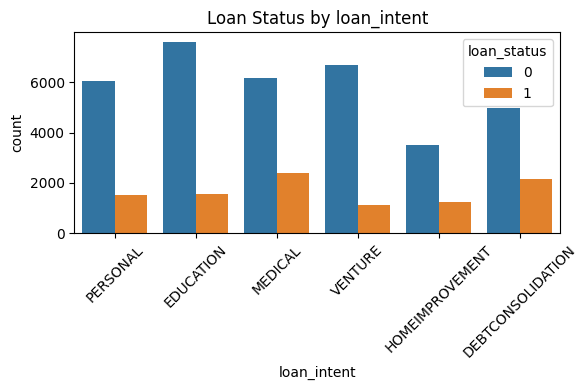

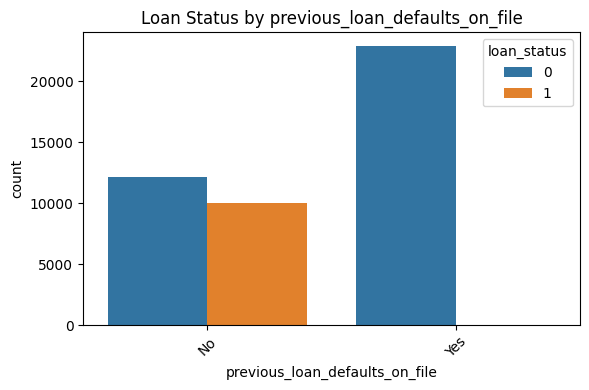

In [10]:
for col in cat_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=col, hue='loan_status')
    plt.title(f"Loan Status by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

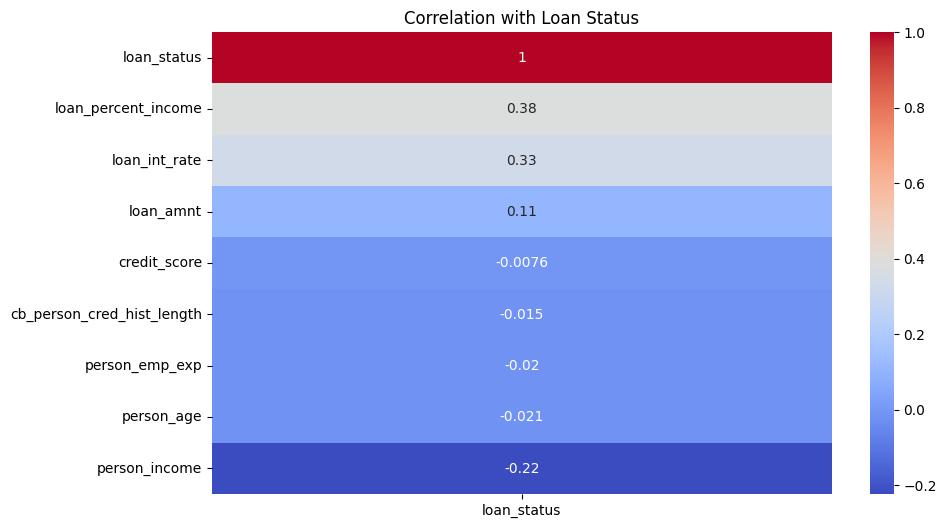

In [ ]:
corr_data = data[num_features + [target]]
corr_matrix = corr_data.corr()
# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix[[target]].sort_values(by=target, ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with Loan Status")
plt.show()

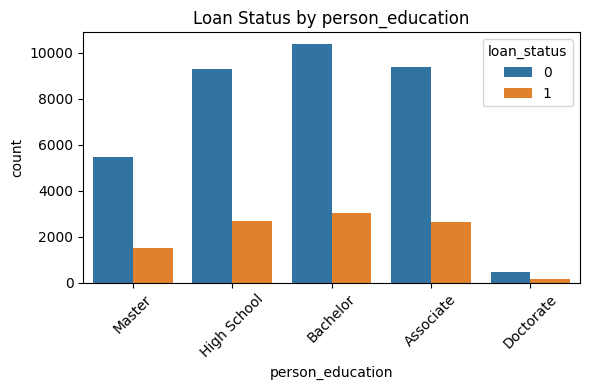

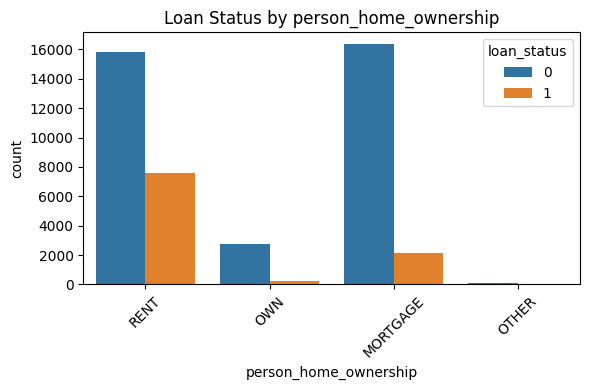

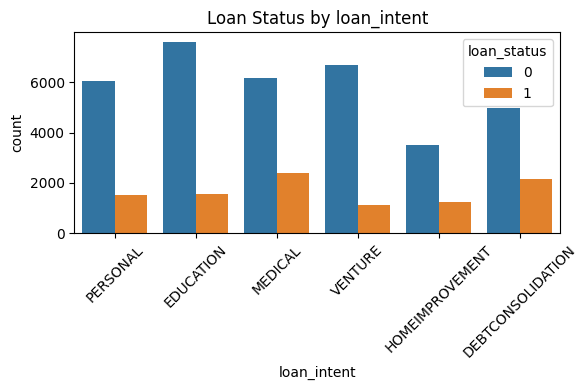

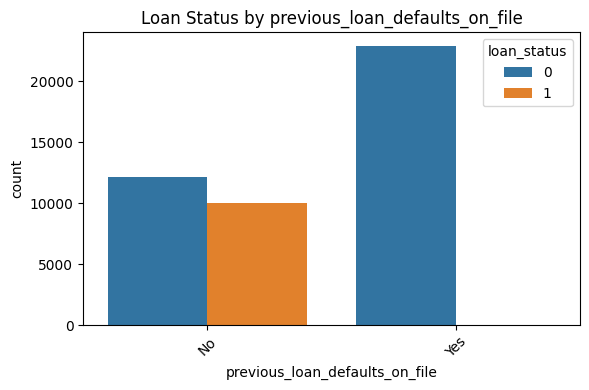

In [ ]:
for col in cat_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=col, hue='loan_status')
    plt.title(f"Loan Status by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [13]:
X = data.drop(columns=[target,'id'])
y = data[target]
data.head()

,id,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,1,22,female,Master,71948.0,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
1,2,21,female,High School,12282.0,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0
2,3,25,female,High School,12438.0,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1
3,4,23,female,Bachelor,79753.0,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1
4,5,24,male,Master,66135.0,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1


In [14]:
X.shape

(45000, 13)

In [ ]:
cat_indices = [X.columns.get_loc(col) for col in [
    'person_gender',
    'person_education',
    'person_home_ownership',
    'loan_intent',
    'previous_loan_defaults_on_file'
]]

# Build the transformer
ct = ColumnTransformer(
    transformers=[("categoricals", OneHotEncoder(drop='first'), cat_indices)],
    remainder='passthrough'
)

# Fit-transform the features
X_transformed = ct.fit_transform(X)
X_transformed = X_transformed.astype('float64')

In [16]:
X_transformed.shape

(45000, 22)

In [17]:
from sklearn.preprocessing import StandardScaler

# Split the data first
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=0)

# Normalize all features (since they are all numeric now, post-encoding)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("X_test shape:", X_test.shape)
parameters = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13]}


X_test shape: (9000, 22)


In [ ]:
def plot_confusion(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


def evaluate_classification(y_true, y_pred, model_name):
    print(f"🔎 {model_name}")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    plot_confusion(y_true, y_pred, model_name)
    print("-" * 60)

def evaluate_regression(y_true, y_pred, model_name):
    print(f"🔎 {model_name}")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("MSE :", mean_squared_error(y_true, y_pred))
    print("-" * 60)


📦 1. Linear Regression


🔎 Linear Regression (Raw Output)
MAE : 0.24413092920396093
MSE : 0.09303118526817604
------------------------------------------------------------
🔎 Linear Regression (Thresholded)
Accuracy : 0.8917777777777778
Precision: 0.7973052138254247
Recall   : 0.6842634489693313
F1 Score : 0.7364718614718615
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      7011
           1       0.80      0.68      0.74      1989

    accuracy                           0.89      9000
   macro avg       0.86      0.82      0.83      9000
weighted avg       0.89      0.89      0.89      9000



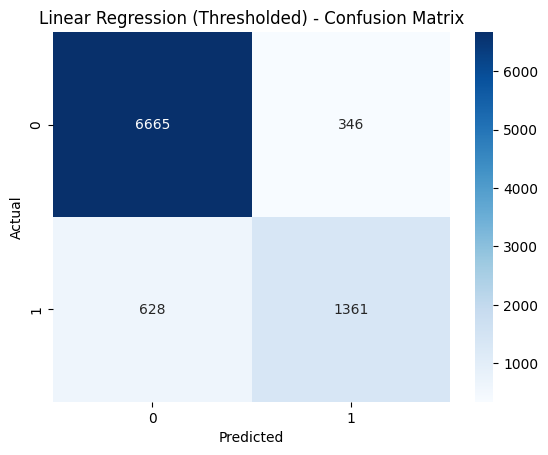

------------------------------------------------------------


In [19]:
# Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_lr = regressor.predict(X_test)

# Convert predictions for classification evaluation
y_pred_lr_class = (y_pred_lr >= 0.5).astype(int)

# Regression metrics
evaluate_regression(y_test, y_pred_lr, "Linear Regression (Raw Output)")

# Classification-style evaluation
evaluate_classification(y_test, y_pred_lr_class, "Linear Regression (Thresholded)")

📦 2. Logistic Regression

🔎 Logistic Regression
Accuracy : 0.893
Precision: 0.7658031088082902
Recall   : 0.743086978381096
F1 Score : 0.754274049502424
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      7011
           1       0.77      0.74      0.75      1989

    accuracy                           0.89      9000
   macro avg       0.85      0.84      0.84      9000
weighted avg       0.89      0.89      0.89      9000



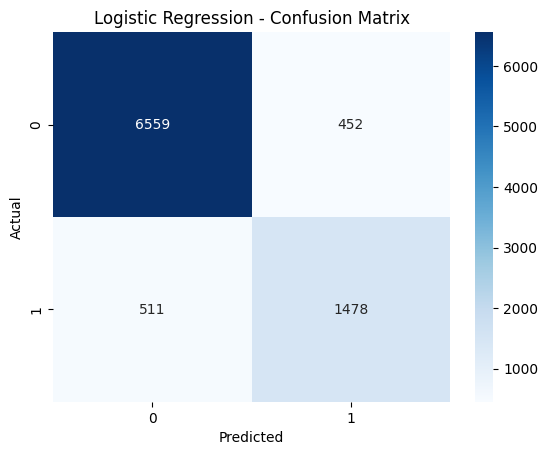

------------------------------------------------------------


In [20]:
# Logistic Regression
logistic = LogisticRegression(max_iter=5000)
logistic.fit(X_train, y_train)
y_pred_logistic = logistic.predict(X_test)

evaluate_classification(y_test, y_pred_logistic, "Logistic Regression")


📦 3. Random Fores

Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
🔎 Random Forest (Tuned)
Accuracy : 0.9304444444444444
Precision: 0.8973760932944607
Recall   : 0.7737556561085973
F1 Score : 0.8309935205183586
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      7011
           1       0.90      0.77      0.83      1989

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



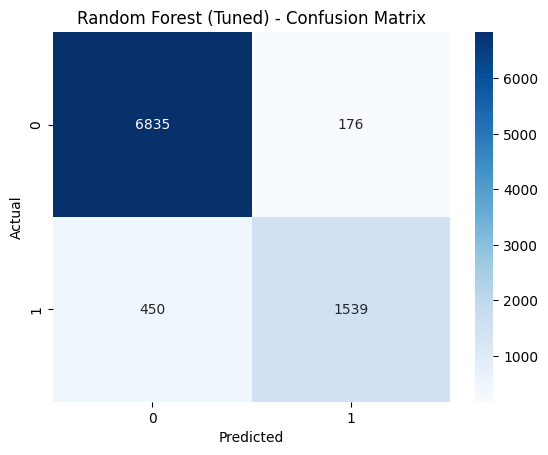

------------------------------------------------------------


In [21]:
# GridSearchCV for Random Forest
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=0),
    param_grid=rf_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)
print("Best Random Forest Parameters:", rf_grid.best_params_)

y_pred_rf = rf_grid.predict(X_test)
evaluate_classification(y_test, y_pred_rf, "Random Forest (Tuned)")


📦 4. K-Nearest Neighbors 

Best KNN Parameters: {'n_neighbors': 15}
🔎 K-Nearest Neighbors (Tuned)
Accuracy : 0.9003333333333333
Precision: 0.8357933579335793
Recall   : 0.6832579185520362
F1 Score : 0.7518672199170126
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94      7011
           1       0.84      0.68      0.75      1989

    accuracy                           0.90      9000
   macro avg       0.88      0.82      0.84      9000
weighted avg       0.90      0.90      0.90      9000



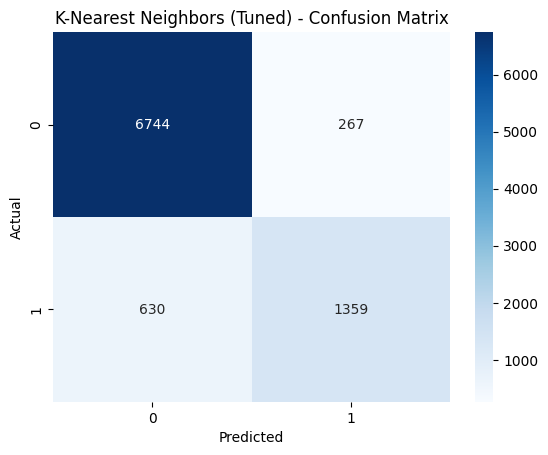

------------------------------------------------------------


In [ ]:
# GridSearchCV for KNN
knn_params = {'n_neighbors': list(range(1, 13))}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_params, scoring='accuracy', cv=5)
knn_grid.fit(X_train, y_train)

print("Best KNN Parameters:", knn_grid.best_params_)
y_pred_knn = knn_grid.predict(X_test)
evaluate_classification(y_test, y_pred_knn, "K-Nearest Neighbors (Tuned)")


📦 5. XGBoost

🔎 XGBoost
Accuracy : 0.9354444444444444
Precision: 0.8868131868131868
Recall   : 0.8114630467571644
F1 Score : 0.847466526647414
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      7011
           1       0.89      0.81      0.85      1989

    accuracy                           0.94      9000
   macro avg       0.92      0.89      0.90      9000
weighted avg       0.93      0.94      0.93      9000



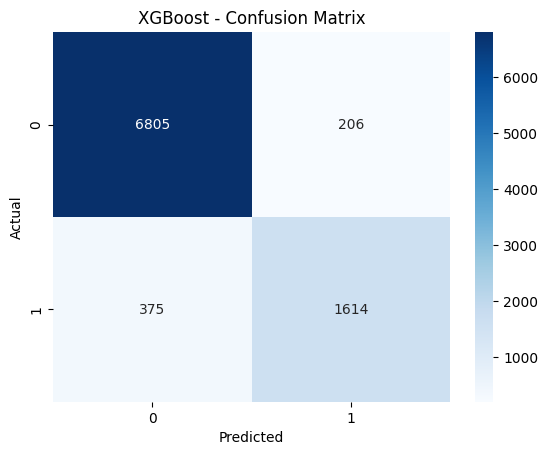

------------------------------------------------------------


In [ ]:
# XGBoost
xgboost_model = xgb.XGBClassifier(random_state=0)
xgboost_model.fit(X_train, y_train)
y_pred_xgb = xgboost_model.predict(X_test)

evaluate_classification(y_test, y_pred_xgb, "XGBoost")


In [24]:
# Store all results
model_scores = []

def collect_classification_score(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    model_scores.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# After evaluating each model, collect their results like:
collect_classification_score(y_test, y_pred_lr_class, "Linear Regression (Thresholded)")
collect_classification_score(y_test, y_pred_logistic, "Logistic Regression")
collect_classification_score(y_test, y_pred_rf, "Random Forest (Tuned)")
collect_classification_score(y_test, y_pred_knn, "K-Nearest Neighbors (Tuned)")
collect_classification_score(y_test, y_pred_xgb, "XGBoost")
results_df = pd.DataFrame(model_scores)
print("📊 All Model Scores:")
print(results_df.sort_values(by="F1 Score", ascending=False))

best_model = results_df.loc[results_df["F1 Score"].idxmax()]
print("\n🏅 Best Model Based on F1 Score:")
print(best_model)

📊 All Model Scores:
                             Model  Accuracy  Precision    Recall  F1 Score
4                          XGBoost  0.935444   0.886813  0.811463  0.847467
2            Random Forest (Tuned)  0.930444   0.897376  0.773756  0.830994
1              Logistic Regression  0.893000   0.765803  0.743087  0.754274
3      K-Nearest Neighbors (Tuned)  0.900333   0.835793  0.683258  0.751867
0  Linear Regression (Thresholded)  0.891778   0.797305  0.684263  0.736472

🏅 Best Model Based on F1 Score:
Model         XGBoost
Accuracy     0.935444
Precision    0.886813
Recall       0.811463
F1 Score     0.847467
Name: 4, dtype: object


In [ ]:
# Load the dataset

X = data.drop(columns=['loan_status'])
y = data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Define categorical and numerical features
cat_features = [
    'person_gender', 'person_education', 'person_home_ownership',
    'loan_intent', 'previous_loan_defaults_on_file'
]

num_features = [
    'person_age', 'person_income', 'person_emp_exp',
    'loan_amnt', 'loan_int_rate', 'loan_percent_income',
    'cb_person_cred_hist_length', 'credit_score'
]

# Create a preprocessor for numerical and categorical features

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(drop='first', sparse=False), cat_features)
])


xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_clf)
])

xgb_pipeline.fit(X_train, y_train)


# Predict on the test set
y_pred_xgb = xgb_pipeline.predict(X_test)

model_scores = []
# Function to collect classification scores

def collect_classification_score(y_true, y_pred, model_name):
    model_scores.append({
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    })

collect_classification_score(y_test, y_pred_xgb, "XGBoost")

# Display all model scores
results_df = pd.DataFrame(model_scores)
print("📊 All Model Scores:")
print(results_df)

# Save the XGBoost pipeline
joblib.dump(xgb_pipeline, 'loan_pipeline.pkl')
print("✅ XGBoost pipeline saved successfully as 'loan_pipeline.pkl'")


C:\Users\sfaxi\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


📊 All Model Scores:
     Model  Accuracy  Precision    Recall  F1 Score
0  XGBoost  0.935444   0.886813  0.811463  0.847467
✅ XGBoost pipeline saved successfully as 'loan_pipeline_xgb.pkl'
